<a href="https://colab.research.google.com/github/world779/GCI/blob/first/home_credit_default_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり

 
path = '/content/drive/My Drive/GCI2020summer/コンペ第2回/input/'

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [ ]:
df.loc[(df["OWN_CAR_AGE"].values > 0) & (df["FLAG_OWN_CAR"].isnull()), "FLAG_OWN_CAR"] = "Y"
df.loc[(df["OWN_CAR_AGE"].values == 0) & (df["FLAG_OWN_CAR"].isnull()), "FLAG_OWN_CAR"] = "N"

In [ ]:
df_test.loc[(df_test["OWN_CAR_AGE"].values > 0) & (df_test["FLAG_OWN_CAR"].isnull()), "FLAG_OWN_CAR"] = "Y"
df_test.loc[(df_test["OWN_CAR_AGE"].values == 0) & (df_test["FLAG_OWN_CAR"].isnull()), "FLAG_OWN_CAR"] = "N"

In [ ]:
print(df.shape)
print(df_test.shape)

(171202, 51)
(61500, 50)


In [ ]:
df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                    22675
FLAG_OWN_REALTY                 34241
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112992
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [ ]:
df_test.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                    8138
FLAG_OWN_REALTY                12334
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        3
AMT_GOODS_PRICE                   53
NAME_TYPE_SUITE                  248
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    40909
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [ ]:
df.loc[(df["NAME_HOUSING_TYPE"].values == "House / apartment") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "Y"
df.loc[(df["NAME_HOUSING_TYPE"].values == "Rented apartment") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df.loc[(df["NAME_HOUSING_TYPE"].values == "Office apartment") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df.loc[(df["NAME_HOUSING_TYPE"].values == "Municipal apartment") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df.loc[(df["NAME_HOUSING_TYPE"].values == "Co-op apartment") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df.loc[(df["NAME_HOUSING_TYPE"].values == "With parents ") & (df["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"

In [ ]:
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "House / apartment") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "Y"
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "Rented apartment") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "Office apartment") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "Municipal apartment") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "Co-op apartment") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"
df_test.loc[(df_test["NAME_HOUSING_TYPE"].values == "With parents ") & (df_test["FLAG_OWN_REALTY"].isnull()), "FLAG_OWN_REALTY"] = "N"

In [ ]:
docs = [_f for _f in df.columns if 'FLAG_DOC' in _f]
live = [_f for _f in df.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]

In [ ]:
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
df_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']


In [ ]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
df = df[df['CODE_GENDER'] != 'XNA']
df_test = df_test[df_test['CODE_GENDER'] != 'XNA']

In [ ]:
df["AGE_INT"]=df["DAYS_BIRTH"]/-365
df_test["AGE_INT"]=df_test["DAYS_BIRTH"]/-365

In [ ]:
df=df.drop("DAYS_BIRTH",axis=1)
df_test=df_test.drop("DAYS_BIRTH",axis=1)

In [ ]:
#df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df['NEW_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df['NEW_DOC_IND_KURT'] = df[docs].kurtosis(axis=1)
df['NEW_LIVE_IND_SUM'] = df[live].sum(axis=1)
df['NEW_INC_PER_CHLD'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
df['NEW_INC_BY_ORG'] = df['ORGANIZATION_TYPE'].map(inc_by_org)
#df['NEW_EMPLOY_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
#df['NEW_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
df['NEW_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
df['NEW_EXT_SOURCES_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df['NEW_SCORES_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df['NEW_SCORES_STD'] = df['NEW_SCORES_STD'].fillna(df['NEW_SCORES_STD'].mean())
df['NEW_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['AGE_INT']
df['NEW_CAR_TO_EMPLOY_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
df['NEW_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['AGE_INT']
df['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
#df['NEW_CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

In [ ]:
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['AGE_INT']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / (1+df['CNT_FAM_MEMBERS'])
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / (1+df['AMT_INCOME_TOTAL'])
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [ ]:
# df['DAYS_EMPLOYED_PERC_PLUS'] = df['DAYS_EMPLOYED'] + df['AGE_INT']
# df['INCOME_CREDIT_PERC_PLUS'] = df['AMT_INCOME_TOTAL'] + df['AMT_CREDIT']
# df['INCOME_PER_PERSON_PLUS'] = df['AMT_INCOME_TOTAL'] + (1+df['CNT_FAM_MEMBERS'])
# df['ANNUITY_INCOME_PERC_PLUS'] = df['AMT_ANNUITY'] + (1+df['AMT_INCOME_TOTAL'])
# df['PAYMENT_RATE_PLUS'] = df['AMT_ANNUITY'] + df['AMT_CREDIT']

# df['DAYS_EMPLOYED_PERC_MINUS'] = df['DAYS_EMPLOYED'] - df['AGE_INT']
# df['INCOME_CREDIT_PERC_MINUS'] = df['AMT_INCOME_TOTAL'] - df['AMT_CREDIT']
# df['INCOME_PER_PERSON_MINUS'] = df['AMT_INCOME_TOTAL'] - (1+df['CNT_FAM_MEMBERS'])
# df['ANNUITY_INCOME_PERC_MINUS'] = df['AMT_ANNUITY'] - (1+df['AMT_INCOME_TOTAL'])
# df['PAYMENT_RATE_MINUS'] = df['AMT_ANNUITY'] - df['AMT_CREDIT']

# df['DAYS_EMPLOYED_PERC_MULTI'] = df['DAYS_EMPLOYED'] * df['AGE_INT']
# df['INCOME_CREDIT_PERC_MULTI'] = df['AMT_INCOME_TOTAL'] * df['AMT_CREDIT']
# df['INCOME_PER_PERSON_MULTI'] = df['AMT_INCOME_TOTAL'] * (1+df['CNT_FAM_MEMBERS'])
# df['ANNUITY_INCOME_PERC_MULTI'] = df['AMT_ANNUITY'] * (1+df['AMT_INCOME_TOTAL'])
# df['PAYMENT_RATE_MULTI'] = df['AMT_ANNUITY'] * df['AMT_CREDIT']

In [ ]:
#df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df_test['NEW_CREDIT_TO_GOODS_RATIO'] = df_test['AMT_CREDIT'] / df_test['AMT_GOODS_PRICE']
df_test['NEW_DOC_IND_KURT'] = df_test[docs].kurtosis(axis=1)
df_test['NEW_LIVE_IND_SUM'] = df_test[live].sum(axis=1)
df_test['NEW_INC_PER_CHLD'] = df_test['AMT_INCOME_TOTAL'] / (1 + df_test['CNT_CHILDREN'])
df_test['NEW_INC_BY_ORG'] = df_test['ORGANIZATION_TYPE'].map(inc_by_org)
#df['NEW_EMPLOY_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
#df['NEW_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
df_test['NEW_SOURCES_PROD'] = df_test['EXT_SOURCE_1'] * df_test['EXT_SOURCE_2'] * df_test['EXT_SOURCE_3']
df_test['NEW_EXT_SOURCES_MEAN'] = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df_test['NEW_SCORES_STD'] = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df_test['NEW_SCORES_STD'] = df_test['NEW_SCORES_STD'].fillna(df_test['NEW_SCORES_STD'].mean())
df_test['NEW_CAR_TO_BIRTH_RATIO'] = df_test['OWN_CAR_AGE'] / df_test['AGE_INT']
df_test['NEW_CAR_TO_EMPLOY_RATIO'] = df_test['OWN_CAR_AGE'] / df_test['DAYS_EMPLOYED']
df_test['NEW_PHONE_TO_BIRTH_RATIO'] = df_test['DAYS_LAST_PHONE_CHANGE'] / df_test['AGE_INT']
df_test['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = df_test['DAYS_LAST_PHONE_CHANGE'] / df_test['DAYS_EMPLOYED']
#df['NEW_CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

In [ ]:
df_test['DAYS_EMPLOYED_PERC'] = df_test['DAYS_EMPLOYED'] / df_test['AGE_INT']
df_test['INCOME_CREDIT_PERC'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_CREDIT']
df_test['INCOME_PER_PERSON'] = df_test['AMT_INCOME_TOTAL'] / (1+df_test['CNT_FAM_MEMBERS'])
df_test['ANNUITY_INCOME_PERC'] = df_test['AMT_ANNUITY'] / (1+df_test['AMT_INCOME_TOTAL'])
df_test['PAYMENT_RATE'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

In [ ]:
# df_test['DAYS_EMPLOYED_PERC_PLUS'] = df_test['DAYS_EMPLOYED'] + df_test['AGE_INT']
# df_test['INCOME_CREDIT_PERC_PLUS'] = df_test['AMT_INCOME_TOTAL'] + df_test['AMT_CREDIT']
# df_test['INCOME_PER_PERSON_PLUS'] = df_test['AMT_INCOME_TOTAL'] + (1+df_test['CNT_FAM_MEMBERS'])
# df_test['ANNUITY_INCOME_PERC_PLUS'] = df_test['AMT_ANNUITY'] + (1+df_test['AMT_INCOME_TOTAL'])
# df_test['PAYMENT_RATE_PLUS'] = df_test['AMT_ANNUITY'] + df_test['AMT_CREDIT']

# df_test['DAYS_EMPLOYED_PERC_MINUS'] = df_test['DAYS_EMPLOYED'] - df_test['AGE_INT']
# df_test['INCOME_CREDIT_PERC_MINUS'] = df_test['AMT_INCOME_TOTAL'] - df_test['AMT_CREDIT']
# df_test['INCOME_PER_PERSON_MINUS'] = df_test['AMT_INCOME_TOTAL'] - (1+df_test['CNT_FAM_MEMBERS'])
# df_test['ANNUITY_INCOME_PERC_MINUS'] = df_test['AMT_ANNUITY'] - (1+df_test['AMT_INCOME_TOTAL'])
# df_test['PAYMENT_RATE_MINUS'] = df_test['AMT_ANNUITY'] - df_test['AMT_CREDIT']

# df_test['DAYS_EMPLOYED_PERC_MULTI'] = df_test['DAYS_EMPLOYED'] * df_test['AGE_INT']
# df_test['INCOME_CREDIT_PERC_MULTI'] = df_test['AMT_INCOME_TOTAL'] * df_test['AMT_CREDIT']
# df_test['INCOME_PER_PERSON_MULTI'] = df_test['AMT_INCOME_TOTAL'] * (1+df_test['CNT_FAM_MEMBERS'])
# df_test['ANNUITY_INCOME_PERC_MULTI'] = df_test['AMT_ANNUITY'] * (1+df_test['AMT_INCOME_TOTAL'])
# df_test['PAYMENT_RATE_MULTI'] = df_test['AMT_ANNUITY'] * df_test['AMT_CREDIT']

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_INT,NEW_CREDIT_TO_GOODS_RATIO,NEW_DOC_IND_KURT,NEW_LIVE_IND_SUM,NEW_INC_PER_CHLD,NEW_INC_BY_ORG,NEW_SOURCES_PROD,NEW_EXT_SOURCES_MEAN,NEW_SCORES_STD,NEW_CAR_TO_BIRTH_RATIO,NEW_CAR_TO_EMPLOY_RATIO,NEW_PHONE_TO_BIRTH_RATIO,NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010032,-878.0,-333.0,-522,NaN,1,1,1,1,0,0,Core staff,2.0,2,2,0,1,1,0,1,1,School,NaN,0.372591,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN,25.295890,1.118800,NaN,4,112500.0,135000.0,NaN,0.372591,0.148728,NaN,NaN,-11.543377,0.332574,-34.709195,0.148969,37500.0,0.322917,0.048105
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,585000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008019,NaN,-4469.0,-3436,NaN,1,0,0,1,0,0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,NaN,0.449567,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0,55.200000,1.000000,NaN,2,225000.0,117000.0,NaN,0.501366,0.073255,NaN,NaN,-11.177536,NaN,NaN,0.384615,75000.0,0.075080,0.028877
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,270000.0,Family,State servant,Secondary / secondary special,Married,House / apartment,0.004960,-523.0,-3640.0,-2050,NaN,1,1,1,1,1,0,Core staff,2.0,2,2,0,0,0,0,0,0,Postal,NaN,0.569503,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN,50.673973,1.237600,NaN,5,54000.0,112500.0,NaN,0.569503,0.148728,NaN,NaN,-10.695826,1.036329,-10.320880,0.161603,18000.0,0.338077,0.054635
3,3,0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,135000.0,Children,Pensioner,Lower secondary,Widow,House / apartment,0.005002,NaN,-4950.0,-3951,NaN,1,0,0,1,1,0,NaN,1.0,3,3,0,0,0,0,0,0,XNA,NaN,0.105235,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.238356,1.132000,NaN,3,67500.0,117000.0,NaN,0.436379,0.468309,NaN,NaN,0.000000,NaN,NaN,0.441696,33750.0,0.131865,0.058245
4,4,1,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,234000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,With parents,0.006296,-697.0,-5101.0,-3226,NaN,1,1,1,1,0,0,Drivers,2.0,3,3,0,0,0,0,1,1,Business Entity Type 3,0.342344,0.202490,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0,29.273973,1.158404,NaN,4,157500.0,157500.0,0.04638,0.404630,0.239439,NaN,NaN,-42.460927,1.783357,-23.809546,0.581038,52500.0,0.136799,0.079486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171197,171197,0,Cash loans,M,Y,Y,0,83250.0,404325.0,20772.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-3059.0,-11581.0,-3689,21.0,1,1,1,1,0,0,Laborers,2.0,2,2,0,0,0,0,1,1,Agriculture,NaN,0.404560,0.768808,0.0,0.0,0.0,0.0,-2341.0,0.0,0.0,1.0,0.0,56.243836,1.198000,NaN,4,83250.0,126000.0,NaN,0.586684,0.257562,0.373374,-0.006865,-41.622339,0.765283,-54.388183,

In [ ]:
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df[bin_feature], uniques = pd.factorize(df[bin_feature])

for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_test[bin_feature], uniques = pd.factorize(df_test[bin_feature])
# Categorical features with One-Hot encode
#df, cat_cols = one_hot_encoder(df, False)
# dropcolum=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4',
# 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
# 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
# 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
# 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
# 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
# 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
#df= df.drop(dropcolum,axis=1)

In [ ]:
print(df.shape)
print(df_test.shape)

(171198, 68)
(61500, 67)


In [ ]:
df.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_EMPLOYED                   30898
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112990
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [ ]:
df=df.drop("NEW_CAR_TO_BIRTH_RATIO",axis=1)
df=df.drop("NEW_CAR_TO_EMPLOY_RATIO",axis=1)
df=df.drop("NEW_DOC_IND_KURT",axis=1)
df=df.drop("NEW_SOURCES_PROD",axis=1)

In [ ]:
df_test=df_test.drop("NEW_CAR_TO_BIRTH_RATIO",axis=1)
df_test=df_test.drop("NEW_CAR_TO_EMPLOY_RATIO",axis=1)
df_test=df_test.drop("NEW_DOC_IND_KURT",axis=1)
df_test=df_test.drop("NEW_SOURCES_PROD",axis=1)

In [ ]:
df.isnull().sum().tail(10)

NEW_INC_BY_ORG                           0
NEW_EXT_SOURCES_MEAN                   117
NEW_SCORES_STD                           0
NEW_PHONE_TO_BIRTH_RATIO                 1
NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER    30899
DAYS_EMPLOYED_PERC                   30898
INCOME_CREDIT_PERC                       0
INCOME_PER_PERSON                        2
ANNUITY_INCOME_PERC                      6
PAYMENT_RATE                             6
dtype: int64

In [ ]:
df_test.isnull().sum()

SK_ID_CURR                 0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
                       ...  
DAYS_EMPLOYED_PERC     10565
INCOME_CREDIT_PERC         0
INCOME_PER_PERSON          0
ANNUITY_INCOME_PERC        3
PAYMENT_RATE               3
Length: 63, dtype: int64

In [ ]:
def feat_ext_source(df):
    x1 = df['EXT_SOURCE_1'].fillna(-1) + 1e-1
    x2 = df['EXT_SOURCE_2'].fillna(-1) + 1e-1
    x3 = df['EXT_SOURCE_3'].fillna(-1) + 1e-1
    
    df['EXT_SOURCE_1over2_NAminus1_Add0.1'] = x1/x2
    df['EXT_SOURCE_2over1_NAminus1_Add0.1'] = x2/x1
    df['EXT_SOURCE_1over3_NAminus1_Add0.1'] = x1/x3
    df['EXT_SOURCE_3over1_NAminus1_Add0.1'] = x3/x1
    df['EXT_SOURCE_2over3_NAminus1_Add0.1'] = x2/x3
    df['EXT_SOURCE_3over2_NAminus1_Add0.1'] = x3/x2
    
    df['EXT_SOURCE_na1_2'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    df['EXT_SOURCE_na1_3'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na2_1'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na2_3'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na3_1'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na3_2'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    
    df['CREDIT_LENGTH'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    
    return df

In [ ]:
df = feat_ext_source(df)
df_test  = feat_ext_source(df_test)

In [ ]:
def cat_to_dummy(train, test):
    train_d = pd.get_dummies(train, drop_first=False)
    test_d = pd.get_dummies(test, drop_first=False)
    # make sure that the number of features in train and test should be same
    for i in train_d.columns:
        if i not in test_d.columns:
            if i!='TARGET':
                train_d = train_d.drop(i, axis=1)
    for j in test_d.columns:
        if j not in train_d.columns:
            if j!='TARGET':
                test_d = test_d.drop(i, axis=1)
    print('Memory usage of train increases from {:.2f} to {:.2f} MB'.format(train.memory_usage().sum() / 1024**2, 
                                                                            train_d.memory_usage().sum() / 1024**2))
    print('Memory usage of test increases from {:.2f} to {:.2f} MB'.format(test.memory_usage().sum() / 1024**2, 
                                                                            test_d.memory_usage().sum() / 1024**2))
    return train_d, test_d

df, df_test = cat_to_dummy(df, df_test)

Memory usage of train increases from 101.88 to 109.23 MB
Memory usage of test increases from 36.13 to 38.77 MB


In [ ]:
df_test.shape

(61500, 177)

In [ ]:
df=df.fillna(-999)

In [ ]:
df_test=df_test.fillna(-999)

In [ ]:
# df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
# df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
# df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
# df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
# df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [ ]:
# df_test['DAYS_EMPLOYED_PERC'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH']
# df_test['INCOME_CREDIT_PERC'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_CREDIT']
# df_test['INCOME_PER_PERSON'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']
# df_test['ANNUITY_INCOME_PERC'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']
# df_test['PAYMENT_RATE'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

In [ ]:
print(df.shape)
print(df_test.shape)

(171198, 178)
(61500, 177)


In [ ]:
# for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
#     df[bin_feature], uniques = pd.factorize(df[bin_feature])

# for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
#     df_test[bin_feature], uniques = pd.factorize(df_test[bin_feature])

In [ ]:
print(df.shape)
print(df_test.shape)

(171198, 178)
(61500, 177)


In [ ]:
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,0,0,0,0,112500.0,755190.0,36328.5,675000.0,0.010032,-878.0,-333.0,-522,-999.0,1,1,1,1,0,0,2.0,2,2,0,1,1,0,1,1,-999.000000,0.372591,-999.000000,0.0,0.0,0.0,0.0,-292.0,-999.0,-999.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,225000.0,585000.0,16893.0,585000.0,0.008019,-999.0,-4469.0,-3436,-999.0,1,0,0,1,0,0,2.0,2,2,0,0,0,0,0,0,-999.000000,0.449567,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,54000.0,334152.0,18256.5,270000.0,0.004960,-523.0,-3640.0,-2050,-999.0,1,1,1,1,1,0,2.0,2,2,0,0,0,0,0,0,-999.000000,0.569503,-999.000000,4.0,0.0,4.0,0.0,-542.0,-999.0,-999.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,67500.0,152820.0,8901.0,135000.0,0.005002,-999.0,-4950.0,-3951,-999.0,1,0,0,1,1,0,1.0,3,3,0,0,0,0,0,0,-999.000000,0.105235,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,1,1,0,0,0,157500.0,271066.5,21546.0,234000.0,0.006296,-697.0,-5101.0,-3226,-999.0,1,1,1,1,0,0,2.0,3,3,0,0,0,0,1,1,0.342344,0.202490,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171197,171197,0,1,1,1,0,83250.0,404325.0,20772.0,337500.0,0.031329,-3059.0,-11581.0,-3689,21.0,1,1,1,1,0,0,2.0,2,2,0,0,0,0,1,1,-999.000000,0.404560,0.768808,0.0,0.0,0.0,0.0,-2341.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171198,171198,0,0,1,1,0,247500.0,601470.0,29065.5,450000.0,0.010006,-129.0,-4629.0,-1773,1.0,1,1,0,1,0,0,1

In [ ]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
#df, cat_cols = one_hot_encoder(df)
#df_test, cat_cols = one_hot_encoder(df_test)

In [ ]:
df.shape

(171198, 178)

In [ ]:
df_test.shape

(61500, 177)

In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values

In [ ]:
X.shape

(171198, 176)

In [ ]:
X_test.shape

(61500, 176)

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.18, random_state=0)

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            boosting_type='gbdt', class_weight=None, colsample_bytree=0.9234,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=399, min_child_weight=0.1,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=13,
               objective=None, random_state=42, reg_alpha=2, reg_lambda=5,
               silent=True, subsample=0.855, subsample_for_bin=200000,
               subsample_freq=0, scale_pos_weight=1
        )
#pipeline=make_pipeline(select,rfc)
clf.fit(X_train, y_train, 
                eval_set= [(X_train, y_train), (X_valid, y_valid)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100  #30
               )

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.779727	valid_1's auc: 0.749842
[200]	training's auc: 0.799043	valid_1's auc: 0.752216
[300]	training's auc: 0.81439	valid_1's auc: 0.753346
[400]	training's auc: 0.827922	valid_1's auc: 0.753396
Early stopping, best iteration is:
[379]	training's auc: 0.825359	valid_1's auc: 0.753734


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9234,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=399, min_child_weight=0.1,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=13,
               objective=None, random_state=42, reg_alpha=2, reg_lambda=5,
               scale_pos_weight=1, silent=True, subsample=0.855,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [ ]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_valid,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


In [ ]:
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=42,
    verbose=True)

In [ ]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9234,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=399, min_child_weight=0.1,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=13,
               objective=None, random_state=42, reg_alpha=2, reg_lambda=5,
               silent=True, subsample=0.855, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [ ]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.761219
Early stopping, best iteration is:
[164]	valid's auc: 0.763219
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.760693
[200]	valid's auc: 0.762515
Early stopping, best iteration is:
[210]	valid's auc: 0.762766
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.759471
[200]	valid's auc: 0.761644
[300]	valid's auc: 0.762578
Early stopping, best iteration is:
[304]	valid's auc: 0.762617
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.759611
[200]	valid's auc: 0.761833
Early stopping, best iteration is:
[177]	valid's auc: 0.76216
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.760455
[200]	valid's auc: 0.762701
Early stopping, best iteration is:
[251]	valid's auc: 0.7633
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.762184
[200]	va

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.1min finished


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.762461
[200]	valid's auc: 0.764522
Early stopping, best iteration is:
[178]	valid's auc: 0.764854
Best score reached: 0.7570046316617818 with params: {'scale_pos_weight': 2} 


In [ ]:
print("Valid+-Std     Train  :   Parameters")
for i in np.argsort(gs_sample_weight.cv_results_['mean_test_score'])[-5:]:
    print('{1:.3f}+- {2:.3f}       :  {0}'.format(gs_sample_weight.cv_results_['params'][i], 
                                    gs_sample_weight.cv_results_['mean_test_score'][i], 
                                    # gs_sample_weight.cv_results_['mean_train_score'][i],
                                    gs_sample_weight.cv_results_['std_test_score'][i]))

Valid+-Std     Train  :   Parameters
0.756+- 0.004       :  {'scale_pos_weight': 12}
0.756+- 0.004       :  {'scale_pos_weight': 6}
0.757+- 0.005       :  {'scale_pos_weight': 1}
0.757+- 0.005       :  {'scale_pos_weight': 2}


In [ ]:
#Configure from the HP optimisation
#clf_final = lgb.LGBMClassifier(**gs.best_estimator_.get_params())

#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.760724
[200]	valid's auc: 0.762916
Early stopping, best iteration is:
[252]	valid's auc: 0.763509


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9234,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=399, min_child_weight=0.1,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=13,
               objective=None, random_state=42, reg_alpha=2, reg_lambda=5,
               silent=True, subsample=0.855, subsample_for_bin=200000,
               subsample_freq=0)

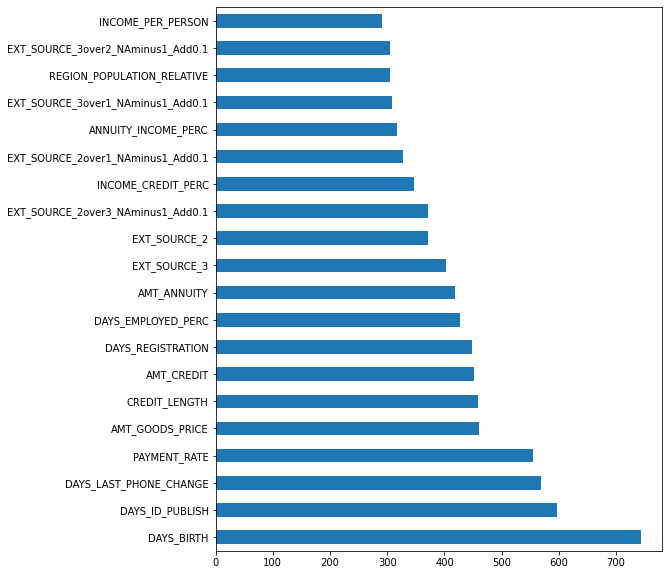

In [ ]:
feat_imp = pd.Series(clf_final.feature_importances_, index=df.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

In [ ]:
path = '/content/drive/My Drive/GCI2020summer/コンペ第2回/'

submission = pd.read_csv(path + 'sample_submission.csv')
submission

,SK_ID_CURR,TARGET
0,171202,0.5
1,171203,0.5
2,171204,0.5
3,171205,0.5
4,171206,0.5
...,...,...
61495,232697,0.5
61496,232698,0.5
61497,232699,0.5
61498,232700,0.5


In [ ]:
probabilities = clf.predict_proba(df_test.drop(['SK_ID_CURR'], axis=1))
submission = pd.DataFrame({
    'SK_ID_CURR': df_test['SK_ID_CURR'],
    'TARGET':     [ row[1] for row in probabilities]
})

In [ ]:
submission

,SK_ID_CURR,TARGET
0,171202,0.022457
1,171203,0.165053
2,171204,0.190990
3,171205,0.113564
4,171206,0.222197
...,...,...
61495,232697,0.124439
61496,232698,0.039437
61497,232699,0.050046
61498,232700,0.173554


In [ ]:
submission.to_csv('/content/drive/My Drive/GCI2020summer/コンペ第2回/submission.csv', index=False)